# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('Chinese.mat',0)
len(X), len(T)

(3220, 3220)

In [6]:
X,T = loaddata('French.mat',1)
len(X), len(T)

(11140, 11140)

In [7]:
X,T = loaddata('German.mat',2)
len(X), len(T)

(14700, 14700)

In [8]:
X,T = loaddata('Russian.mat',3)
len(X), len(T)

(18406, 18406)

In [9]:
X,T = loaddata('Spanish.mat',4)
len(X), len(T)

(22030, 22030)

## Split Dataset

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((17624, 39, 39), (4406, 39, 39))

## Convert 2D dataset to a 1D vector

In [11]:
batchSize=128
num_classes=5
epochs=10
imageRows, imageCols =39,39

In [12]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [13]:
input_shape

(39, 39, 1)

In [14]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [15]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(39, 39, 1..., kernel_regularizer=<keras.reg...)`
  """
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_si

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [18]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 17624 samples, validate on 4406 samples
Epoch 1/10
17624/17624 [==============================] - 23s 1ms/step - loss: 1.9520 - acc: 0.8634 - val_loss: 1.5228 - val_acc: 0.9362
Epoch 2/10
17624/17624 [==============================] - 17s 983us/step - loss: 1.1516 - acc: 0.9758 - val_loss: 0.9989 - val_acc: 0.9514
Epoch 3/10
17624/17624 [==============================] - 17s 955us/step - loss: 0.7750 - acc: 0.9810 - val_loss: 0.6233 - val_acc: 0.9877
Epoch 4/10
17624/17624 [==============================] - 17s 967us/step - loss: 0.5359 - acc: 0.9855 - val_loss: 0.4434 - val_acc: 0.9884
Epoch 5/10
17624/17624 [==============================] - 17s 937us/step - loss: 0.3750 - acc: 0.9906 - val_loss: 0.4166 - val_acc: 0.9557
Epoch 6/10
17624/17624 [==============================] - 18s 1ms/step - loss: 0.2839 - acc: 0.9888 - val_loss: 0.2678 - val_acc: 0.9839
Epoch 7/10
17624/17624 [==============================] - 17s 946us/step - loss: 0.2189 - acc: 0.9918 - val_loss: 0.1996 

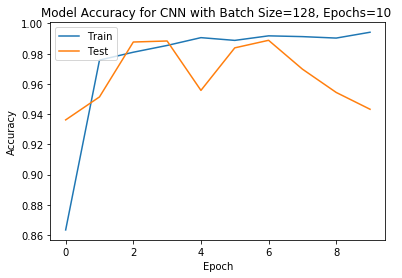

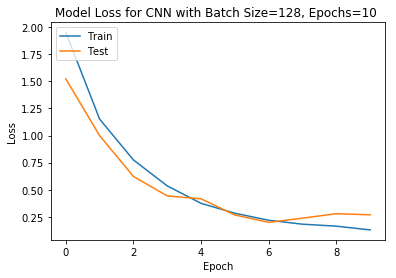

In [19]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [21]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Chinese','French','German','Russian','Spanish'])

Confusion Matrix for Train Data
columns    Chinese     French     German    Russian    Spanish
rows                                                          
Chinese  99.632889   0.339750   0.009871   0.007340   0.010261
French    6.558745  93.365258   0.043597   0.014991   0.018204
German    0.377081   0.569076  97.487879   1.257437   0.308643
Russian   0.044974   0.104110   0.126298  99.478096   0.246534
Spanish   0.367349   0.077983   0.289176  18.494187  80.771279


In [22]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Chinese','French','German','Russian','Spanish'])

Confusion Matrix for Test Data
columns    Chinese     French     German    Russian    Spanish
rows                                                          
Chinese  99.190295   0.779154   0.012267   0.008616   0.009597
French    6.372591  93.557686   0.037251   0.014636   0.017816
German    0.484771   0.629523  97.169811   1.326809   0.389064
Russian   0.261160   0.089438   0.169192  99.227822   0.252468
Spanish   0.257080   0.110347   0.261021  22.616175  76.755345
